In [19]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [20]:
# Daftar saham Indonesia populer
saham_indo = {
    'BBRI': 'Bank Rakyat Indonesia',
    'BBCA': 'Bank Central Asia',
    'BMRI': 'Bank Mandiri',
    'ASII': 'Astra International',
    'TLKM': 'Telekomunikasi Indonesia',
    'JSMR': 'Jasa Marga',
    'INDF': 'Indofood',
    'UNVR': 'Unilever Indonesia',
    'ANTM': 'Aneka Tambang'
}

# Tambah suffix .JK untuk Indonesian Stock Exchange
saham_list = [f'{ticker}.JK' for ticker in saham_indo.keys()]
print("Saham yang akan dianalisis:")
for ticker, nama in saham_indo.items():
    print(f"  {ticker} - {nama}")

Saham yang akan dianalisis:
  BBRI - Bank Rakyat Indonesia
  BBCA - Bank Central Asia
  BMRI - Bank Mandiri
  ASII - Astra International
  TLKM - Telekomunikasi Indonesia
  JSMR - Jasa Marga
  INDF - Indofood
  UNVR - Unilever Indonesia
  ANTM - Aneka Tambang


In [21]:
# Download data saham dari yfinance
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

print(f"\nDownloading data dari {start_date.date()} hingga {end_date.date()}...")

# Download data untuk semua saham
data = yf.download(saham_list, start=start_date, end=end_date, progress=False)

print(f"Data berhasil didownload! Shape: {data['Close'].shape}")
print(f"\nData terakhir ({end_date.date()}):")
print(data['Close'].tail())

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4164\3799616220.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(saham_list, start=start_date, end=end_date, progress=False)


Data berhasil didownload! Shape: (237, 9)

Data terakhir (2026-01-28):
Ticker      ANTM.JK  ASII.JK  BBCA.JK  BBRI.JK  BMRI.JK  INDF.JK  JSMR.JK  \
Date                                                                        
2026-01-22   4220.0   6775.0   7650.0   3810.0   4980.0   6750.0   3550.0   
2026-01-23   4290.0   6825.0   7650.0   3850.0   4990.0   6825.0   3600.0   
2026-01-26   4760.0   6875.0   7650.0   3850.0   4910.0   6800.0   3650.0   
2026-01-27   4610.0   6300.0   7500.0   3820.0   4810.0   6700.0   3660.0   
2026-01-28   4420.0   6175.0   7025.0   3590.0   4560.0   6850.0   3590.0   

Ticker      TLKM.JK  UNVR.JK  
Date                          
2026-01-22   3740.0   2280.0  
2026-01-23   3770.0   2250.0  
2026-01-26   3850.0   2150.0  
2026-01-27   3940.0   2060.0  
2026-01-28   3470.0   1980.0  


In [22]:
# Analisis performa saham
print("=" * 60)
print("ANALISIS PERFORMA SAHAM INDONESIA (1 Tahun Terakhir)")
print("=" * 60)

performance = pd.DataFrame()
for ticker in saham_list:
    ticker_short = ticker.replace('.JK', '')
    close_data = data['Close'][ticker]
    
    # Hitung return (%)
    return_pct = ((close_data.iloc[-1] - close_data.iloc[0]) / close_data.iloc[0]) * 100
    
    # Hitung volatilitas
    volatility = close_data.pct_change().std() * np.sqrt(252) * 100
    
    # Harga min dan max
    min_price = close_data.min()
    max_price = close_data.max()
    current_price = close_data.iloc[-1]
    
    performance = pd.concat([performance, pd.DataFrame({
        'Saham': [ticker_short],
        'Harga Saat Ini': [f'Rp {current_price:.0f}'],
        'Return (%)': [f'{return_pct:.2f}%'],
        'Volatilitas (%)': [f'{volatility:.2f}%'],
        'Min (1 Tahun)': [f'Rp {min_price:.0f}'],
        'Max (1 Tahun)': [f'Rp {max_price:.0f}']
    })], ignore_index=True)

print(performance.to_string(index=False))

ANALISIS PERFORMA SAHAM INDONESIA (1 Tahun Terakhir)
Saham Harga Saat Ini Return (%) Volatilitas (%) Min (1 Tahun) Max (1 Tahun)
 BBRI        Rp 3590     -4.34%          35.81%       Rp 3061       Rp 4289
 BBCA        Rp 7025    -20.34%          29.28%       Rp 7025       Rp 9636
 BMRI        Rp 4560    -16.06%          36.35%       Rp 3928       Rp 5433
 ASII        Rp 6175     40.30%          33.09%       Rp 4125       Rp 7400
 TLKM        Rp 3470     41.79%          39.50%       Rp 2123       Rp 3940
 JSMR        Rp 3590    -12.45%          33.61%       Rp 3300       Rp 4312
 INDF        Rp 6850     -6.99%          30.41%       Rp 6447       Rp 8525
 UNVR        Rp 1980     27.96%          56.83%        Rp 952       Rp 2770
 ANTM        Rp 4420    232.62%          56.93%       Rp 1315       Rp 4760


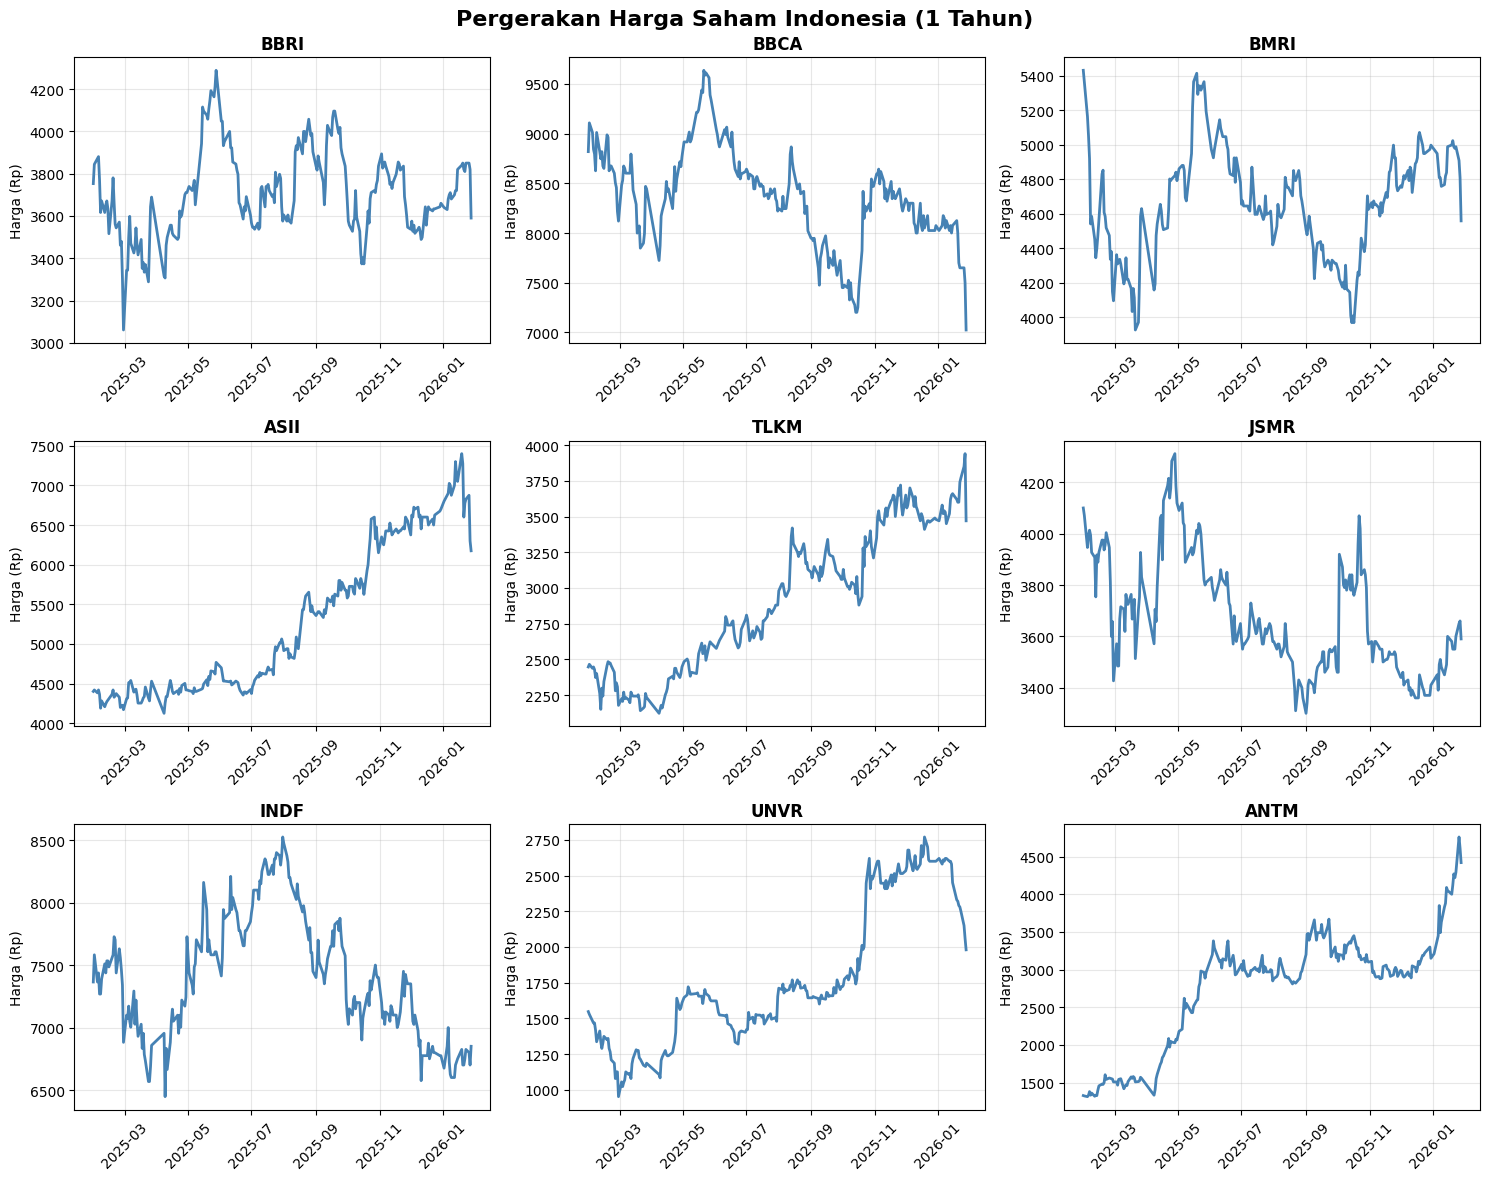

✓ Grafik pergerakan harga saham berhasil ditampilkan


In [23]:
# Visualisasi pergerakan harga saham
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Pergerakan Harga Saham Indonesia (1 Tahun)', fontsize=16, fontweight='bold')

for idx, ticker in enumerate(saham_list):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    ticker_short = ticker.replace('.JK', '')
    close_data = data['Close'][ticker]
    
    ax.plot(close_data.index, close_data.values, linewidth=2, color='steelblue')
    ax.set_title(ticker_short, fontweight='bold')
    ax.set_ylabel('Harga (Rp)')
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("✓ Grafik pergerakan harga saham berhasil ditampilkan")

In [24]:
hasil = []

for ticker in saham_list:
    ticker_short = ticker.replace('.JK', '')
    close = data['Close'][ticker]
    
    ma20 = close.rolling(20).mean()
    ma50 = close.rolling(50).mean()
    
    harga_sekarang = close.iloc[-1]
    ma20_val = ma20.iloc[-1]
    ma50_val = ma50.iloc[-1]
    
    mom = ((harga_sekarang - close.iloc[-30]) / close.iloc[-30]) * 100
    
    skor = 0
    if ma20_val > ma50_val:
        skor += 1
    if mom > 0:
        skor += 1
    if harga_sekarang > ma50_val:
        skor += 1
    if harga_sekarang > ma20_val:
        skor += 1
    
    vol_recent = close.iloc[-30:].pct_change().std() * 100
    if vol_recent < close.pct_change().std() * 100:
        skor += 1
    
    hasil.append({
        'Saham': ticker_short,
        'Harga': harga_sekarang,
        'MA20': ma20_val,
        'MA50': ma50_val,
        'Momentum 30H': mom,
        'Score': skor
    })

df_hasil = pd.DataFrame(hasil).sort_values('Score', ascending=False)

print("\nSaham yg potensial naik:")
for idx, row in df_hasil.iterrows():
    sym = row['Saham']
    scr = row['Score']
    mom_val = row['Momentum 30H']
    
    if scr >= 4:
        label = "SANGAT BAGUS"
    elif scr == 3:
        label = "BAGUS"
    elif scr == 2:
        label = "NETRAL"
    else:
        label = "AVOID"
    
    print(f"{sym} - Score: {scr}/5, Momentum: {mom_val:+.1f}% ({label})")


Saham yg potensial naik:
JSMR - Score: 5/5, Momentum: +6.5% (SANGAT BAGUS)
ANTM - Score: 4/5, Momentum: +52.9% (SANGAT BAGUS)
BBRI - Score: 3/5, Momentum: +2.9% (BAGUS)
INDF - Score: 3/5, Momentum: +4.2% (BAGUS)
BMRI - Score: 2/5, Momentum: -6.0% (NETRAL)
ASII - Score: 1/5, Momentum: -4.3% (AVOID)
TLKM - Score: 1/5, Momentum: -2.8% (AVOID)
UNVR - Score: 1/5, Momentum: -22.4% (AVOID)
BBCA - Score: 0/5, Momentum: -12.2% (AVOID)


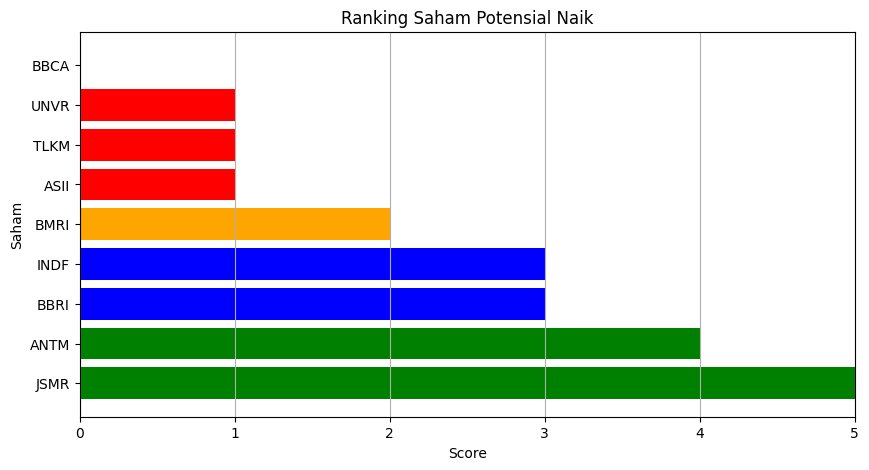

In [25]:
warna = []
for s in df_hasil['Score']:
    if s >= 4:
        warna.append('green')
    elif s == 3:
        warna.append('blue')
    elif s == 2:
        warna.append('orange')
    else:
        warna.append('red')

plt.figure(figsize=(10, 5))
plt.barh(df_hasil['Saham'], df_hasil['Score'], color=warna)
plt.xlabel('Score')
plt.ylabel('Saham')
plt.title('Ranking Saham Potensial Naik')
plt.xlim(0, 5)
plt.grid(axis='x')
plt.show()